<a href="https://colab.research.google.com/github/christianio123/Projects/blob/main/CIFAR_10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

The Canadian Institute For Advanced Research (CIFAR) has several reputable datasets. In this project, we will be working with the CIFAR-10 dataset. The CIFAR-10 is a labeled subset of the '80 million tiny images' dataset collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes (labels), with 6000 images in each class.  

- CIFAR-10 is a dataset that consists of the following 10 classes:
    1. Airplanes
    2. Cars
    3. Birds
    4. Cats
    5. Deer
    6. Dogs
    7. Frogs
    8. Horses
    9. Ships
    10. Trucks
    
Our objective is to train a deep learning model to classify an image by identifying which target class the image belongs to. We will divide the images for the dataset into two sets, training and testing. Our training dataset will consist of 50,000 images, while our testing dataset will consist of 10,000 images. A "testing dataset" is made to have a sample of data that our model has not seen yet because it will only be exposed to the "training dataset" initially. When we train the model, we adjust weights within our classifier model, and once the model is fully trained we "remove" that training data and use the testing data instead. 

## Convolutional Neural Networks (CNNs)

**Images - How to digitally represent an image**

Any image can be represented by pixels, a bunch of zeros and ones. One type of image are *greyscale images*,  where '0' represents black and '255' represents white. Any number between '0' and '255' represents a particular shade of gray. An image may be "32-bit", meaning the image has 32 locations. Each location can have a '0' or '1' in a binary representation system. 

If we wanted to represent a color image, we would need to combine three channels, which is where the term "Red-Green-Blue", or "RGB" is often referred to.

**CNN Basics**

Artificial neural networks in general are information processing models that try to mimic the human brain. In our brain, we have biological neurons. These neurons have *dendrites* that process the information within the nucleus and send the output to what is called an *axon*. 

Artificial Neural Networks try to mimic the same process mathematically. Inputs and weights are multiplied, which mimic the function of *dendrites*. A bias signal is then added, just like what is seen in the nucleus. Next, and activation function occurs, just like when then nucleus send the output to the *axon*. 

**Network Overview**

We cannot feed the images directly into a 'fully connected neuron', in this case the model. We need to have some type of preprocessing completed on the images first, hence 'convolutional neural network'. The first step in our convolution will be feature extraction (or feature detection). In our model we will be applying the Rectified Liniear Unit activation function, or "ReLu" for short. Next, we compress the images to help increase the computational performance of the network and also reduce the computational complexity because there are less pixels. Then we flatten the features, or compressed images, into an array. As an array, our 'image' is now ready to feed into our model.

**Network Overview - Feature Detection**

Simply put, a convolution is a kernel matrix that can be used to scan a given image and apply a filter to obtain a certain effect. An example would be applying a filter on Instagram, Snapchat, or other platforms. Kernels are often used in machine learning for feature extraction in selecting the most important pixels of an image. After applying feature detectors (or kernals), we generate 'feature maps'. Feature maps are different variations of the image.

Convolutions help preserve the spatial relationship between pixels, that is, pixels can become meaningful when grouped together. However, if we take an original image and feed it to the artificial neural network, we would lose that spacial dependency betweem the pixels. This would cause the network performance to be terrible, which is why we apply convolutions first before we perform flattening and feed the images to the artificial neural network. 

**Rectified Linear Units (ReLU)**

ReLU layers are used to add non-linearity in the generated feature maps. Quite often, the ReLU is used to enhance the sparsity of the features or how scattered the feature map is. If any value is less than zero, the function will just set the value to zero. However, for values greater than zero, the value will remain the same. 

**Pooling (Downsampling)**

Downsampling and pooling are used interchangeably. Downsampling take place after convolutional layers in order to reduce feature map dimensionality. Doing so not only preserves the features but improves computational efficiency. When the most important features are identified, the model becomes uses maximum feature response and is then able to generalize important features and avoid overfitting. In addition, retaining the maximum 

## Import Libraries

In [1]:
import pandas as pd # for data manipulation 
import numpy as np 
import matplotlib.pyplot as plt # for data plotting
import seaborn as sns # addition visualization

## Import Dataset

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # Return a new object with default settings for the given purpose.

In [3]:
from keras.datasets import cifar10
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


## Data Exploration

**Data Shape**

In [4]:
X_train.shape

(50000, 32, 32, 3)

Respectively, there are 50000 samples. The width of the image is 32. The height of the image is 32, and there are 3 channels. 

In [5]:
X_test.shape

(10000, 32, 32, 3)

In our test set, we have 10000 samples.

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

Our y variable match their x indepedent variables. 

**Visualization**

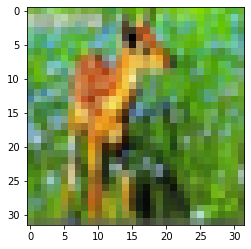

In [8]:
plt.imshow(X_train[1005]);

Selecting a random image to view. The image has a very low resolution making it difficult to identify. If we are not sure, we can confirm with the label.

In [9]:
print(y_train[1005])

[4]


The image corresponds to class four. The class four label identifies as deer.

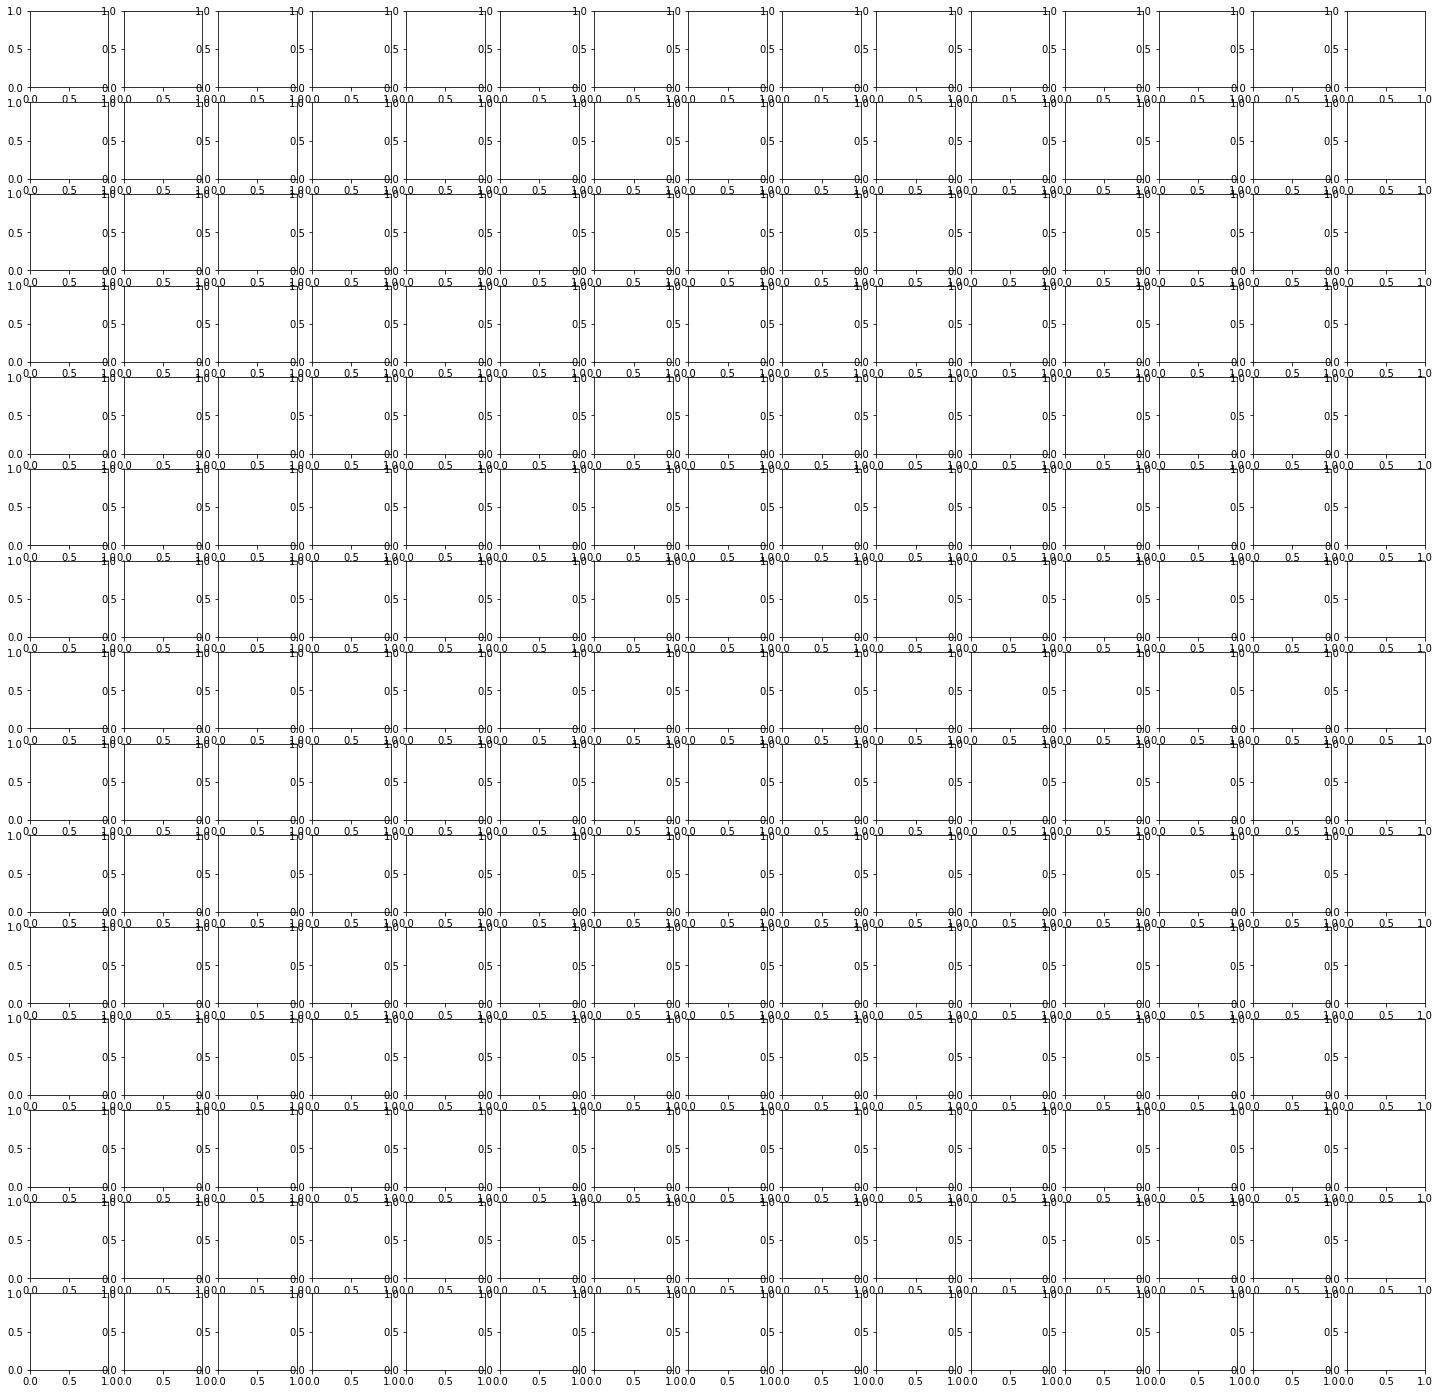

In [10]:
Grid_Width = 15
Grid_Height = 15

fig, axes = plt.subplots(Grid_Width, Grid_Height, figsize = (25,25))
axes = axes.ravel() # Flatten the 15x15 images into 255 arrays


n_training = len(X_train)

Now that we have defined our frame, we will create a for loop to input the images. 

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


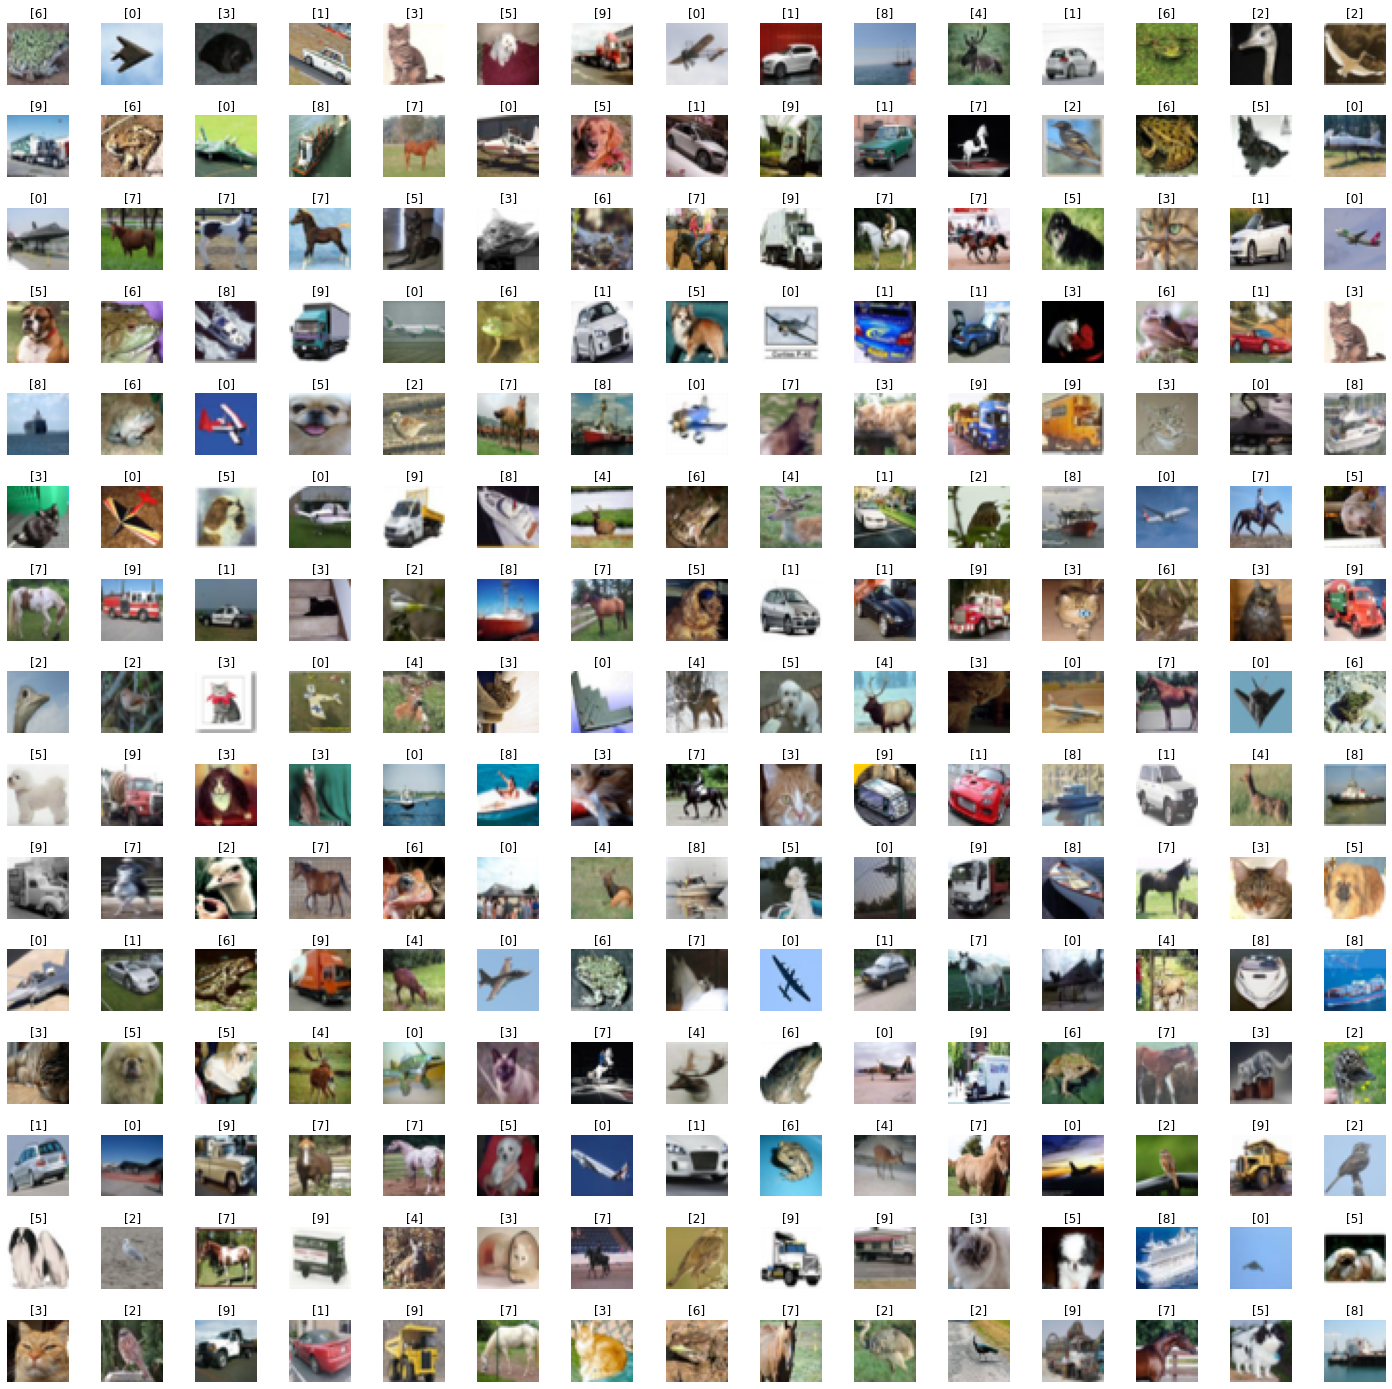

In [11]:
Grid_Width = 15
Grid_Height = 15

fig, axes = plt.subplots(Grid_Width, Grid_Height, figsize = (25,25))
axes = axes.ravel() # Flatten the 15x15 images into 255 arrays


n_training = len(X_train)

for i in np.arange(0, Grid_Height * Grid_Width):
    index = np.random.randint(0, n_training) # selecting random integers up until the length of training data
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) # include their labels respectively.
    axes[i].axis("off") # removing x and y tick marks

plt.subplots_adjust(hspace=0.5) # change spacing between images

## Data Preprocessing

The first step will be to change our data type to float32

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Set a variable to the number of categories<br>
The actual classes need to be converted into binary values because when we train our convolutional neural networks, we will have 10 output in the actual network.

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10) # there are 10 labels (10 categories)
y_test = to_categorical(y_test, 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


X_train will have numbers indicating the values of the pixels. The numbers ranged from 0 to 255, indicating the different colors of the RGB channels. We will normalize to just have numbers between 0 and 1.

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
print(X_train.shape)

(50000, 32, 32, 3)


## Model

**Create Model**

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam # optimization to obtain the weights of the network
from keras.callbacks import TensorBoard

- Conv2D: convolution process 
- MaxPooling2D: to do downsampling, compressing features 
- AveragePooling2D: downsampling using the average of the pixels 
- Dense: create fully connected artificial neural network 
- Flatten: flatten into array 
- Dropout: Regularization

In [17]:
cnn_model = Sequential() # instantiate our model

# Input/First Layer
cnn_model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = [32,32,3]))

# Second Layer
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

# Max Pooling Layer
cnn_model.add(MaxPooling2D(2,2)) # (2,2) means we will downsample the features into size 2x2

# Add dropout layer
cnn_model.add(Dropout(0.3)) # Dropout 30% of the neurons along with their weights

# Fifth Layer
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

# Sixth Layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))

# Seventh Layer
cnn_model.add(MaxPooling2D(2,2)) # (2,2) means we will downsample the features into size 2x2

# Eighth Layer
cnn_model.add(Dropout(0.2)) # Dropout 30% of the neurons along with their weights

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1536, activation = 'relu')) # Fully connect, units = number of neurons

cnn_model.add(Dense(units = 1536, activation = 'relu')) # Fully connect, units = number of neurons

# Output layer
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

----------
cnn_model.add(Conv2D(    *first we created a convolution 2D* <br>
    (filters = 32,   *added 32 filters*  <br>
     kernal_size = (3,3), *each filter consists of 3x3 matrix*<br>
     activation = 'relu', <br>
     input_shape = [32,32,3])))  *adding first convolutional layer* <br>
     
----------

In the output layer, we no longer could use 'relu' so we opted for softmax.

**Training the Model**

Now that we have built our network, we will compile our model and then fit our model with the training data. Since we are talking about categorical classification, we use 'categorical crossentropy' as our loss. As an optimizer, we will use root mean squared error. The optimizer will have a learning rate, which is how fast the network is going to be trained. Our metrics will consist of accuracy.

In [18]:
from tensorflow.keras import optimizers
cnn_model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Now we can fit our training data to our model. We will first define a new variable, 'history', which captures all the progression of the network as it is being trained. So all the values of root mean squared error, validation, accuracy, and more. 

In [19]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True, verbose = 2)

Epoch 1/2
1563/1563 - 18s - loss: 0.2428 - accuracy: 0.4219 - 18s/epoch - 12ms/step
Epoch 2/2
1563/1563 - 9s - loss: 0.1792 - accuracy: 0.6092 - 9s/epoch - 6ms/step


- batch_size: how many images will be fed to the network at once. 

- shuffle: shuffle the images so the network can be exposed to a different order of images 

In [20]:
history = cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 300, shuffle = True, verbose = 2)

Epoch 1/300
782/782 - 5s - loss: 0.1499 - accuracy: 0.6813 - 5s/epoch - 6ms/step
Epoch 2/300
782/782 - 5s - loss: 0.1386 - accuracy: 0.7113 - 5s/epoch - 6ms/step
Epoch 3/300
782/782 - 5s - loss: 0.1314 - accuracy: 0.7267 - 5s/epoch - 6ms/step
Epoch 4/300
782/782 - 5s - loss: 0.1263 - accuracy: 0.7411 - 5s/epoch - 6ms/step
Epoch 5/300
782/782 - 5s - loss: 0.1219 - accuracy: 0.7497 - 5s/epoch - 6ms/step
Epoch 6/300
782/782 - 5s - loss: 0.1196 - accuracy: 0.7584 - 5s/epoch - 6ms/step
Epoch 7/300
782/782 - 5s - loss: 0.1157 - accuracy: 0.7675 - 5s/epoch - 6ms/step
Epoch 8/300
782/782 - 5s - loss: 0.1137 - accuracy: 0.7727 - 5s/epoch - 6ms/step
Epoch 9/300
782/782 - 5s - loss: 0.1124 - accuracy: 0.7766 - 5s/epoch - 6ms/step
Epoch 10/300
782/782 - 5s - loss: 0.1119 - accuracy: 0.7794 - 5s/epoch - 6ms/step
Epoch 11/300
782/782 - 5s - loss: 0.1104 - accuracy: 0.7829 - 5s/epoch - 6ms/step
Epoch 12/300
782/782 - 5s - loss: 0.1091 - accuracy: 0.7848 - 5s/epoch - 6ms/step
Epoch 13/300
782/782 - 5s

**Model Tuning**

Changed parameters to test different filters, units, output activation function, and loss method. 

In [21]:
cnn_model2 = Sequential() # instantiate our model

# Input/First Layer
cnn_model2.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = [32,32,3]))

# Second Layer
cnn_model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

# Max Pooling Layer
cnn_model2.add(MaxPooling2D(2,2)) # (2,2) means we will downsample the features into size 2x2

# Add dropout layer
cnn_model2.add(Dropout(0.3)) # Dropout 30% of the neurons along with their weights

# Fifth Layer
cnn_model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

# Sixth Layer
cnn_model2.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

# Seventh Layer
cnn_model2.add(MaxPooling2D(2,2)) # (2,2) means we will downsample the features into size 2x2

# Eighth Layer
cnn_model2.add(Dropout(0.2)) # Dropout 30% of the neurons along with their weights

cnn_model2.add(Flatten())

cnn_model2.add(Dense(units = 124, activation = 'relu')) # Fully connect, units = number of neurons

cnn_model2.add(Dense(units = 364, activation = 'relu')) # Fully connect, units = number of neurons

# Output layer
cnn_model2.add(Dense(units = 10, activation = 'softmax'))

In [22]:
cnn_model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
history_v2 = cnn_model2.fit(X_train, y_train, batch_size = 100, epochs = 300, shuffle = True, verbose = 2)

Epoch 1/300
500/500 - 4s - loss: 1.8384 - accuracy: 0.3293 - 4s/epoch - 8ms/step
Epoch 2/300
500/500 - 3s - loss: 1.4429 - accuracy: 0.4805 - 3s/epoch - 5ms/step
Epoch 3/300
500/500 - 3s - loss: 1.2535 - accuracy: 0.5534 - 3s/epoch - 5ms/step
Epoch 4/300
500/500 - 3s - loss: 1.1321 - accuracy: 0.6000 - 3s/epoch - 5ms/step
Epoch 5/300
500/500 - 3s - loss: 1.0471 - accuracy: 0.6316 - 3s/epoch - 5ms/step
Epoch 6/300
500/500 - 3s - loss: 0.9691 - accuracy: 0.6576 - 3s/epoch - 5ms/step
Epoch 7/300
500/500 - 3s - loss: 0.9037 - accuracy: 0.6821 - 3s/epoch - 5ms/step
Epoch 8/300
500/500 - 3s - loss: 0.8589 - accuracy: 0.6986 - 3s/epoch - 5ms/step
Epoch 9/300
500/500 - 3s - loss: 0.8066 - accuracy: 0.7146 - 3s/epoch - 5ms/step
Epoch 10/300
500/500 - 3s - loss: 0.7674 - accuracy: 0.7310 - 3s/epoch - 5ms/step
Epoch 11/300
500/500 - 3s - loss: 0.7357 - accuracy: 0.7392 - 3s/epoch - 5ms/step
Epoch 12/300
500/500 - 3s - loss: 0.7064 - accuracy: 0.7531 - 3s/epoch - 5ms/step
Epoch 13/300
500/500 - 3s

## Evaluate

In our data, we have 60,000 images. We divided those images into two sets, 50,000 for training and then 10,000 for testing. When evaluating the model, we use our testing data and not our training data. After hyperparameter tuning, we will use our second model yielding higher accuracy and lower loss. However, we can evaluate both models for fun. We will print our test accuracy. Evaluation returns two elements, validation and accuracy, we will focus on .

**Model 1 - history**

In [24]:
evaluation1 = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation1[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3251 - accuracy: 0.1000
Test Accuracy: 0.10000000149011612


**Model 2 - history_v2**

In [25]:
evaluation2 = cnn_model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation1[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0373 - accuracy: 0.7507
Test Accuracy: 0.10000000149011612


As expected from our training data, our second model using a *categorical crossentropy* and *softmax* activation function outperformed the first model with 75% accuracy compared to 41% accuracy. We will now take the better performing model (model two) and feed it with the X_test images, and have it predict which classes the output will be. 

In [26]:
predicted_classes = cnn_model2.predict (X_test)
predicted_classes=np.argmax(predicted_classes,axis=1)
predicted_classes

array([3, 1, 1, ..., 5, 1, 7])

Next we compare the predicted classes to the ground_truth labels. However, before we can do that, we had previously converted our y_test decimals to a different categories (the binary format). In order to revert y_test, we use *argmax()* of 1, which will return the original values.  

In [27]:
y_test = y_test.argmax(1)
print(y_test)

[3 8 8 ... 5 1 7]


Now we can evaluate the model via visualizations plotting predicted values and true values. First, we create a matrix just like before (i.e. the subplots). We will follow similar steps as before with *ravel()* to flatten and a for loop from 0 to the area length. 

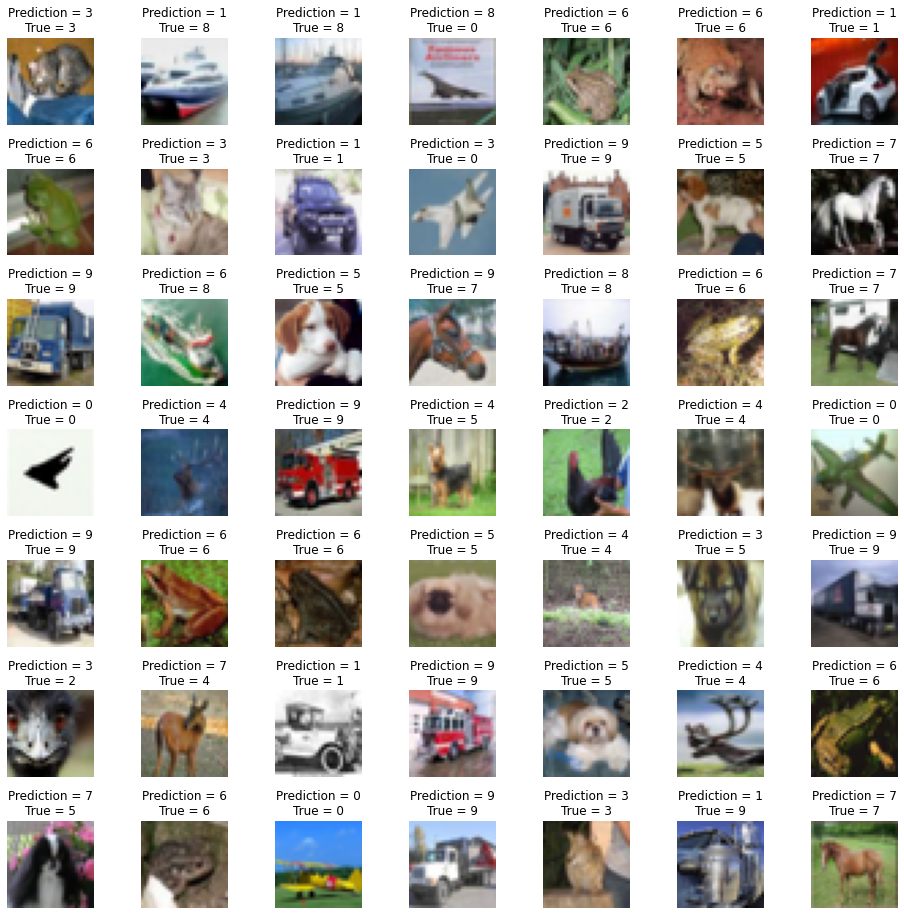

In [28]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (16,16))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Prediction = {predicted_classes[i]}\nTrue = {y_test[i]}')
    axes[i].axis('off')
    
plt.subplots_adjust(hspace= 0.5, wspace = 0.5)

In addition to visualizing the data using a subset of images, a much more effective tool used to evaluate our data is the confusion matrix. A confusion matrix is a matrix that can be used to just summarize all our results in one location.

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
print(cm)
print(cm.shape)

[[739  26  46  33  21  10  27   8  56  34]
 [ 10 862   5   4   2   5  26   1   7  78]
 [ 42   4 604  58  67  56 126  30   7   6]
 [ 12   4  40 581  50 138 121  36  10   8]
 [ 13   0  51  57 713  20  85  54   4   3]
 [  5   1  35 154  41 643  54  60   2   5]
 [  5   1  14  37  13  13 913   3   1   0]
 [  6   3  18  41  46  43  31 800   1  11]
 [ 54  41  18  20   4   9  25   2 793  34]
 [ 16  54   7   9   5   7  20  10  13 859]]
(10, 10)


Our confusion matrix is 10x10, summarizing the number of values correctly classified and samples misclassified. We can visualize the confusion matrix using a heatmap within the seaborn package. The rows will show what the model is predicting while the columns show the true values. 

Text(123.0, 0.5, 'Model Predicted Values')

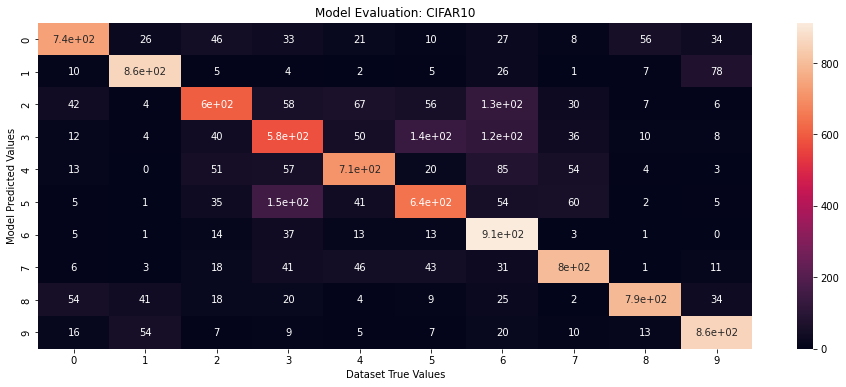

In [30]:
plt.figure(figsize = (16,6))
sns.heatmap(cm, annot = True)
plt.title("Model Evaluation: CIFAR10")
plt.xlabel("Dataset True Values")
plt.ylabel("Model Predicted Values")

## Save Model

It's good habit to save the model due to the extensive training (i.e., time taken to train) the model underwent. To do so, we use the 'os' package to save the model directly. First a directory needs to be established, preferrably a new folder with the model in the same working directory as the code/notebook. If there is not directory, we can use a conditional expression check if there is a saved model contained, then just save the model. Then we create a path for the model specifically. 

In [31]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'Keras_CIFAR10_Trained_Model.h5')
cnn_model.save(model_path)

## Image Augmentation

Sometimes, in order for the model to perform better generalization, image augmentation is used. That is, we can create alternate versions of the training data so the model can be exposed to variations of the images. To do this we will use the ImageDataGenerator from keras. ImageDataGenerator gives almost limitless options to alter our images. We will rotate our image randomly between 0 and 90 degrees, flip them, shift the images up up and down, then we will apply the fit method again on sample of the training set only.  

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# Sample Training Data
Samp_TraningData = X_train[:10]

Trained_SampData = ImageDataGenerator(rotation_range = 90, vertical_flip = True, height_shift_range=0.1)
Trained_SampData.fit(Samp_TraningData)

To create many variations of our images, we can use for loop iterating out trained data sample using the *.flow()* method to generate a flow/batch of images with each one getting rotated. Then we cane define another for loop to display all the images in batches. 

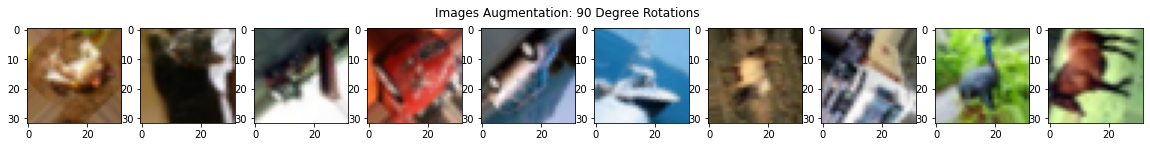

In [33]:
from keras.preprocessing.image import array_to_img

fig = plt.figure(figsize = (20,2))

for x_batch in Trained_SampData.flow(Samp_TraningData, batch_size = 10):
    for i in range(0, 10):
        ax = fig.add_subplot(1, 10, i+1)
        ax.imshow(array_to_img(x_batch[i]))
    fig.suptitle("Images Augmentation: 90 Degree Rotations")
    plt.show()
    break;

We can now train our model using the augmented images. All we have to do is git the training dataset onto the previously defined ImageDataGenerator variable, that is Trained_SampData. However, we will change the variable name to suit the action taking place by defining a new variable.

In [34]:
Augmented_ImageData = ImageDataGenerator(rotation_range = 90, 
                                         vertical_flip = True, 
                                         height_shift_range= 0.1,
                                         width_shift_range= 0.1)

In [35]:
Augmented_ImageData.fit(X_train)

In [36]:
cnn_model2.fit_generator(Augmented_ImageData.flow(X_train, y_train, batch_size = 32), epochs = 300, verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/300
1563/1563 - 32s - loss: 1.8816 - accuracy: 0.3179 - 32s/epoch - 21ms/step
Epoch 2/300
1563/1563 - 32s - loss: 1.7661 - accuracy: 0.3621 - 32s/epoch - 20ms/step
Epoch 3/300
1563/1563 - 32s - loss: 1.7194 - accuracy: 0.3767 - 32s/epoch - 20ms/step
Epoch 4/300
1563/1563 - 32s - loss: 1.6807 - accuracy: 0.3935 - 32s/epoch - 20ms/step
Epoch 5/300
1563/1563 - 31s - loss: 1.6652 - accuracy: 0.3987 - 31s/epoch - 20ms/step
Epoch 6/300
1563/1563 - 32s - loss: 1.6468 - accuracy: 0.4074 - 32s/epoch - 20ms/step
Epoch 7/300
1563/1563 - 32s - loss: 1.6371 - accuracy: 0.4115 - 32s/epoch - 20ms/step
Epoch 8/300
1563/1563 - 32s - loss: 1.6265 - accuracy: 0.4134 - 32s/epoch - 20ms/step
Epoch 9/300
1563/1563 - 31s - loss: 1.6191 - accuracy: 0.4200 - 31s/epoch - 20ms/step
Epoch 10/300
1563/1563 - 31s - loss: 1.6058 - accuracy: 0.4233 - 31s/epoch - 20ms/step
Epoch 11/300
1563/1563 - 31s - loss: 1.6017 - accuracy: 0.4261 - 31s/epoch - 20ms/step
Epoch 12/300
1563/1563 - 31s - loss: 1.5998 - accura

We can evaluate the model using the same steps as before, using the *.evaluate()* method, and passing in the test data. However, we need to return our y_test variable into the categorical binary format.  

In [37]:
y_test = to_categorical(y_test, 10)

In [38]:
score = cnn_model2.evaluate(X_test, y_test)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.1000
[2.3026511669158936, 0.10000000149011612]


Our model accuracy did not improve and our loss has incrased. More tuning of the model, both original and augmented, should be applied. However, we can now save our model with the augmented images.

In [39]:
model_path = os.path.join(directory, 'Keras_CIFAR10_Trained_Model_Augmented.h5')
cnn_model.save(model_path)